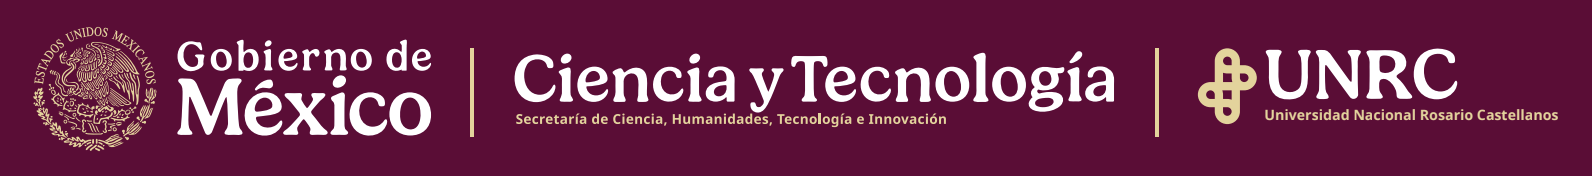

**Proyecto Prototípico**

“Desafíos en la Gestión de Espacios Educativos en el Nivel Superior”

**Integrantes:**

- Isis Minerva Osorio Cano

- Lizbeth Fernandez Viñas

- Rocío Olvera Guzmán

**Licenciatura en Ciencia de Datos para Negocios**

**Universidad Nacional Rosario Castellanos**

**Grupo 601**


#Numeralia UNRC

In [1]:
#Instalamos Dash
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:
      Successfully uninstalled Flask-3.1.1


In [2]:
#Importamos las librerias que ocuparemos
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import dash
from dash import dcc, html
import base64
import plotly
from dash import dcc, html, dash_table

In [3]:
Colores = ['#283C55','#5E466E', '#B56576', '#E56B6F', '#EAAC8B', '#355070', '#515575', '#9D5D7D','#CD6873', '#E88C7D', '#283C55','#5E466E', '#B56576', '#E56B6F', '#EAAC8B', '#355070', '#515575', '#9D5D7D','#CD6873', '#E88C7D']

Importación de bases de datos sobre la universidad

En las bases de datos se encontrará el NaN esto significa que no hay datos al respecto

In [4]:
#Importamos la base de datos del numero de estudiantes por año y licenciatura
df_Est_per = pd.read_csv('/content/drive/MyDrive/Proyecto P./Numeralia UNRC - Matricula de licenciatura por año.csv')
df_Est_per.head()

,Año,Programa Académico,Modalidad,Hombres,Mujeres,Total
0,2019,Ingeniería en Control y Automatización,Presencial,0,0,66
1,2019,Administración y Comercio,A distancia,0,0,"1,026"
2,2019,Ciencia de Datos,Presencial,0,0,69
3,2019,Ciencias Ambientales,Presencial,0,0,73
4,2019,Ciencias Ambientales para Zonas Urbanas,Presencial,0,0,323


In [5]:
# @title Limpieza del DF de las licenciaturas
#Limpiamos los datos
df_Est_per = df_Est_per.dropna()
#Revisamos si el tipo de valores corresponden a lo que necesitamos
df_Est_per.dtypes

#Tranformamos los valores que son objeto a un entero
columnas_c = ['Hombres', 'Mujeres', 'Total']
df_Est_per[columnas_c] = df_Est_per[columnas_c].replace(',', '', regex=True)
df_Est_per[columnas_c] = df_Est_per[columnas_c].astype(int)

#Corroboramos
df_Est_per.dtypes

#Repetimos lo miismo con los demas DF

,0
Año,int64
Programa Académico,object
Modalidad,object
Hombres,int64
Mujeres,int64
Total,int64


In [6]:
#Tambien importamos la base de datos de la matricula por unidad académica
df_Est_UA = pd.read_csv('/content/drive/MyDrive/Proyecto P./Numeralia UNRC - Matricula por unidad académica.csv')
df_Est_UA.head()

,Año,Azcapotzalco,Coyoacán,Gustavo A. Madero,Justo Sierra,La Magdalena Contreras,Milpa Alta,Casco Santo Tomás,Euzkadi,Oceania,Familia Juárez Maza,Herrerías,Olímpica,A Distancia
0,2019,435,"1,265","3,132",0,0,0,0,0,0,0,0,0,"2,117"
1,2020,886,"1,929","4,489",740,0,0,0,0,0,0,0,0,"5,384"
2,2021,"1,595","2,646","6,889","1,204",913,165,0,0,0,0,0,0,"12,017"
3,2022,"1,850","2,522","6,568","1,165","1,086",162,0,108,406,160,227,234,"21,497"
4,2023,"1,598","2,089","5,699","1,363","1,140",0,"3,419",384,405,420,336,156,"26,042"


In [7]:
# @title Limpieza del DF de las Unidades Académicas
df_Est_UA = df_Est_UA.dropna()

df_Est_UA.dtypes

columnas_UA = [
    'Año', 'Azcapotzalco', 'Coyoacán', 'Gustavo A. Madero', 'Justo Sierra',
    'La Magdalena Contreras', 'Milpa Alta', 'Casco Santo Tomás', 'Euzkadi',
    'Oceania', 'Familia Juárez Maza', 'Herrerías', 'Olímpica', 'A Distancia'
]
df_Est_UA[columnas_UA] = df_Est_UA[columnas_UA].replace(',', '', regex=True)
df_Est_UA[columnas_UA] = df_Est_UA[columnas_UA].astype(int)

df_Est_UA.dtypes

,0
Año,int64
Azcapotzalco,int64
Coyoacán,int64
Gustavo A. Madero,int64
Justo Sierra,int64
La Magdalena Contreras,int64
Milpa Alta,int64
Casco Santo Tomás,int64
Euzkadi,int64
Oceania,int64


In [8]:
# Y por ultimo agregaremos la oferta y la demanda de la UNRC
df_ODE = pd.read_csv('/content/drive/MyDrive/Proyecto P./Numeralia UNRC - Oferta demanda egresados.csv')
df_ODE.head()

,Año,Aspirantes PIRC,Aspirantes seleccionados,Egresados
0,2019,"13,675","6,949",NaN
1,2020,"10,401","6,479",NaN
2,2021,"23,872","12,001",160
3,2022,"27,906","10,851",499
4,2023,"51,614","8,538","2,553"


In [9]:
# @title Limpieza del DF de la oferta y demanda de la UNRC
df_ODE = df_ODE.dropna()

df_ODE.dtypes

df_ODE['Año'] = df_ODE['Año'].astype(int)
df_ODE['Aspirantes PIRC'] = df_ODE['Aspirantes PIRC'].replace(',', '', regex=True)
df_ODE['Aspirantes PIRC'] = df_ODE['Aspirantes PIRC'].astype(int)
df_ODE['Aspirantes seleccionados'] = df_ODE['Aspirantes seleccionados'].replace(',', '', regex=True)
df_ODE['Aspirantes seleccionados'] = df_ODE['Aspirantes seleccionados'].astype(int)
df_ODE['Egresados'] = df_ODE['Egresados'].replace(',', '', regex=True)
df_ODE['Egresados'] = df_ODE['Egresados'].astype(int)


df_ODE.dtypes

<ipython-input-9-100ba7a38a1b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ODE['Año'] = df_ODE['Año'].astype(int)
<ipython-input-9-100ba7a38a1b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ODE['Aspirantes PIRC'] = df_ODE['Aspirantes PIRC'].replace(',', '', regex=True)
<ipython-input-9-100ba7a38a1b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,0
Año,int64
Aspirantes PIRC,int64
Aspirantes seleccionados,int64
Egresados,int64


In [10]:
#Importamos la base de datos de las licenciaturas por unidad académica
df_Lic_UA = pd.read_csv('/content/drive/MyDrive/Proyecto P./Numeralia UNRC - Matricula y lic por plantel.csv')
df_Lic_UA.head()

,Año,Programa Académico,Azcapotzalco,Justo Sierra,Coyoacán,Gustavo A. Madero,Magdalena Contreras,Milpa Alta,Casco de Santo Tomás,Sub. Euzkadi,Sub Oceania,Sub. Familia Maza Juaréz,Sub. Herrerías,Sub. Olimpica. C.C
0,2019,Derecho y Criminología,0,0,505,822,0,0,0,0,0,0,0,0
1,2019,Administración y Comercio,0,0,0,0,0,0,0,0,0,0,0,0
2,2019,Relaciones Internacionales,0,0,282,467,0,0,0,0,0,0,0,0
3,2019,Contaduría y Finanzas,0,0,302,575,0,0,0,0,0,0,0,0
4,2019,Tecnología de Información y Comunicación,0,0,0,486,0,0,0,0,0,0,0,0


In [11]:
# @title Limpieza de los datos de licenciaturas por U.A
df_Lic_UA = df_Lic_UA.dropna()

df_Lic_UA.dtypes

#juntamos todas la columnas en una sola
df_Lic_UA['Azcapotzalco'] = df_Lic_UA['Azcapotzalco'].replace(',','' , regex=True)
df_Lic_UA['Justo Sierra'] = df_Lic_UA['Justo Sierra'].replace(',','' , regex=True)
df_Lic_UA['Coyoacán'] = df_Lic_UA['Coyoacán'].replace(',','' , regex=True)
df_Lic_UA['Gustavo A. Madero'] = df_Lic_UA['Gustavo A. Madero'].replace(',','' , regex=True)
df_Lic_UA['Magdalena Contreras'] = df_Lic_UA['Magdalena Contreras'].replace(',','' , regex=True)
df_Lic_UA['Milpa Alta'] = df_Lic_UA['Milpa Alta'].replace(',','' , regex=True)
df_Lic_UA['Casco de Santo Tomás'] = df_Lic_UA['Casco de Santo Tomás'].replace(',','' , regex=True)
df_Lic_UA['Sub. Euzkadi'] = df_Lic_UA['Sub. Euzkadi'].replace(',','' , regex=True)
df_Lic_UA['Sub Oceania'] = df_Lic_UA['Sub Oceania'].replace(',','' , regex=True)
df_Lic_UA['Sub. Familia Maza Juaréz'] = df_Lic_UA['Sub. Familia Maza Juaréz'].replace(',','' , regex=True)
df_Lic_UA['Sub. Herrerías'] = df_Lic_UA['Sub. Herrerías'].replace(',','' , regex=True)
df_Lic_UA['Sub. Olimpica. C.C'] = df_Lic_UA['Sub. Olimpica. C.C'].replace(',','' , regex=True)


df_Lic_UA['Azcapotzalco'] = df_Lic_UA['Azcapotzalco'].astype(int)
df_Lic_UA['Justo Sierra'] = df_Lic_UA['Justo Sierra'].astype(int)
df_Lic_UA['Coyoacán'] = df_Lic_UA['Coyoacán'].astype(int)
df_Lic_UA['Gustavo A. Madero'] = df_Lic_UA['Gustavo A. Madero'].astype(int)
df_Lic_UA['Magdalena Contreras'] = df_Lic_UA['Magdalena Contreras'].astype(int)
df_Lic_UA['Milpa Alta'] = df_Lic_UA['Milpa Alta'].astype(int)
df_Lic_UA['Casco de Santo Tomás'] = df_Lic_UA['Casco de Santo Tomás'].astype(int)
df_Lic_UA['Sub. Euzkadi'] = df_Lic_UA['Sub. Euzkadi'].astype(int)
df_Lic_UA['Sub Oceania'] = df_Lic_UA['Sub Oceania'].astype(int)
df_Lic_UA['Sub. Familia Maza Juaréz'] = df_Lic_UA['Sub. Familia Maza Juaréz'].astype(int)
df_Lic_UA['Sub. Herrerías'] = df_Lic_UA['Sub. Herrerías'].astype(int)
df_Lic_UA['Sub. Olimpica. C.C'] = df_Lic_UA['Sub. Olimpica. C.C'].astype(int)

df_Lic_UA.dtypes

,0
Año,int64
Programa Académico,object
Azcapotzalco,int64
Justo Sierra,int64
Coyoacán,int64
Gustavo A. Madero,int64
Magdalena Contreras,int64
Milpa Alta,int64
Casco de Santo Tomás,int64
Sub. Euzkadi,int64


In [12]:
# @title Grafica de la Oferta-Demanda-Egresados Total
# Grafica Oferta demanda de la UNRC
figODE = go.Figure(go.Funnel(
    y=["Aspirantes que realizaron el PIRC",
       "Aspirantes seleccionados",
       "Egresados"],
    x=[df_ODE['Aspirantes PIRC'].sum(),
       df_ODE['Aspirantes seleccionados'].sum(),
       df_ODE['Egresados'].sum()],
       textinfo = "value+percent initial",
       marker=dict(color=Colores),
       textposition='inside',
    )
)
figODE.update_layout(title='Oferta, Demanda y Egresados en el Periodo 2019-2024',
                     title_font=dict(size=20, color='black'),
                     font=dict(family='New Times Roman', size=15, color='black'),
                     width=1000,
                     height=500,
                     funnelmode="stack",
                     paper_bgcolor='white',
                     plot_bgcolor='white')

figODE.show()

In [84]:
from sys import path_importer_cache
# @title Graficas de la Oferta-Demanda-Egresados por año
#2021
dfODE2021 = df_ODE[df_ODE['Año'] == 2021]
#2022
dfODE2022 = df_ODE[df_ODE['Año'] == 2022]
#2023
dfODE2023 = df_ODE[df_ODE['Año'] == 2023]
#2024
dfODE2024 = df_ODE[df_ODE['Año'] == 2024]

#Generamos una figura
fig_ODE = go.Figure()
etiquetas_ode=['Aspirantes que realizaron el PIRC', 'Aspirantes seleccionados', 'Egresados']
#Graficamos el embudo general 2019-2024
fig_ODE.add_trace(go.Funnel(
        y=etiquetas_ode,
        x=[df_ODE['Aspirantes PIRC'].sum(),
           df_ODE['Aspirantes seleccionados'].sum(),
           df_ODE['Egresados'].sum()],
       text=etiquetas_ode,
       textinfo = "text+value+percent initial",
       marker=dict(color=Colores),
       visible=True,
       connector=dict(visible=False)
    ))
#Graficamos 2021
fig_ODE.add_trace(go.Funnel(
    y=etiquetas_ode,
    x=[dfODE2021['Aspirantes PIRC'].sum(),
       dfODE2021['Aspirantes seleccionados'].sum(),
       dfODE2021['Egresados'].sum()],
       text=etiquetas_ode,
       textinfo = "text+value+percent initial",
       marker=dict(color=Colores),
       visible=False,
       connector=dict(visible=False)
    ))
#Graficamos 2022
fig_ODE.add_trace(go.Funnel(
    y=etiquetas_ode,
    x=[dfODE2022['Aspirantes PIRC'].sum(),
       dfODE2022['Aspirantes seleccionados'].sum(),
       dfODE2022['Egresados'].sum()],
       text=etiquetas_ode,
       textinfo = "text+value+percent initial",
       marker=dict(color=Colores),
       visible=False,
       connector=dict(visible=False)
))
#Graficamos 2023
fig_ODE.add_trace(go.Funnel(
    y=etiquetas_ode,
    x=[dfODE2023['Aspirantes PIRC'].sum(),
       dfODE2023['Aspirantes seleccionados'].sum(),
       dfODE2023['Egresados'].sum()],
       text=etiquetas_ode,
       textinfo = "text+value+percent initial",
       marker=dict(color=Colores),
       visible=False,
       connector=dict(visible=False)
))
#Graficamos 2024
fig_ODE.add_trace(go.Funnel(
    y=etiquetas_ode,
    x=[dfODE2024['Aspirantes PIRC'].sum(),
       dfODE2024['Aspirantes seleccionados'].sum(),
       dfODE2024['Egresados'].sum()],
       text=etiquetas_ode,
       textinfo = "text+value+percent initial",
       marker=dict(color=Colores),
       textposition='inside',
       visible=False,
       connector=dict(visible=False)
))
fig_ODE.update_layout(
    width=900,
    height=500,
    title='Apirantes en Proceso de Selección, Seleccionados y Egresados',
    title_font=dict(size=20, color='black'),
    font=dict(family='New Times Roman', size=15, color='black'),
    paper_bgcolor='white',
    plot_bgcolor='white',
    yaxis_showticklabels=False

)
#Creamos un Slider para poder movernos de uno a otro
Slider_ODE = []
for i, label in enumerate(['2019-2024','2021', '2022', '2023', '2024']):
    slider_ode = dict(
        method='update',
        label=label,
        args = [{"visible": [False] * len(fig_ODE.data)}]
    )
    slider_ode['args'][0]['visible'][i] = True
    Slider_ODE.append(slider_ode)

fig_ODE.update_layout(
    sliders=[dict(
        active=0,
        currentvalue={'prefix': 'Año: '},
        steps=Slider_ODE
)]
)
fig_ODE.show()

In [14]:
# @title Graficas de las licenciaturas por año modalidad  presencial
#Creamos una figura
figLic_presencial = go.Figure()
#Seleccionamos el 2019
dfLic2019 = df_Est_per[df_Est_per['Año'] == 2019]
#Separaremos las lic a distancia y las presenciales ya que ninguna tiene las dos moodalidades
dfLic2019_presencial = dfLic2019[dfLic2019['Modalidad'] == 'Presencial']
#Graficamos a presencial
figLic_presencial.add_trace(go.Bar(name= 'Presencial',
                 y=dfLic2019_presencial['Programa Académico'],
                 x=dfLic2019_presencial['Total'],
                 marker=dict(color=Colores),
                 visible=False,
                 orientation='h'

))
#----------------------------------------------------------------------------------------------------------------------------
#Ahora con el 2020
dfLic2020 = df_Est_per[df_Est_per['Año'] == 2020]
dfLic2020_presencial = dfLic2020[dfLic2020['Modalidad'] == 'Presencial']

#Graficamos a la modalidad presencial
figLic_presencial.add_trace(go.Bar(name= 'Presencial',
                 y=dfLic2020_presencial['Programa Académico'],
                 x=dfLic2020_presencial['Total'],
                 marker=dict(color=Colores),
                 visible=False,
                 orientation='h'
))

#---------------------------------------------------------------------------------------------------------------------------
#Ahora con el año 2021
#se debe mencionar que a partir de este año ya hay algunas licenciaturas que comparten dos modalidades
dfLic2021 = df_Est_per[df_Est_per['Año'] == 2021]
dfLic2021_presencial = dfLic2021[dfLic2021['Modalidad'] == 'Presencial']

#Graficamos la modalidad presencial
figLic_presencial.add_trace(go.Bar(name= 'Presencial',
                                   y=dfLic2021_presencial['Programa Académico'],
                                   x=dfLic2021_presencial['Total'],
                                   marker=dict(color=Colores),
                                   visible=False,
                                   orientation='h'
))
#------------------------------------------------------------------------------------------------------------------------
#Año 2022
dfLic2022 = df_Est_per[df_Est_per['Año'] == 2022]
dfLic2022_presencial = dfLic2022[dfLic2022['Modalidad'] == 'Presencial']
#Graficamos la modalidad presencial
figLic_presencial.add_trace(go.Bar(name= 'Presencial',
                                   y=dfLic2022_presencial['Programa Académico'],
                                   x=dfLic2022_presencial['Total'],
                                   marker=dict(color=Colores),
                                   visible=False,
                                   orientation='h'
))
#------------------------------------------------------------------------------------------------------------------------
#Año 2023
dfLic2023 = df_Est_per[df_Est_per['Año'] == 2023]
dfLic2023_presencial = dfLic2023[dfLic2023['Modalidad'] == 'Presencial']

#Graficamos para el año 2023
figLic_presencial.add_trace(go.Bar(name='Presencial',
                                   y=dfLic2023_presencial['Programa Académico'],
                                   x=dfLic2023_presencial['Total'],
                                   marker=dict(color=Colores),
                                   visible=False,
                                   orientation='h'
))
# ------------------------------------------------------------------------------------------------------------------------
#Año 2024
dfLic2024 = df_Est_per[df_Est_per['Año'] == 2024]
dfLic2024_presencial = dfLic2024[dfLic2024['Modalidad'] == 'Presencial']

#Graficamos para el año 2024
figLic_presencial.add_trace(go.Bar(name='Presencial',
                                   y=dfLic2024_presencial['Programa Académico'],
                                   x=dfLic2024_presencial['Total'],
                                   marker=dict(color=Colores),
                                   visible=True,
                                   orientation='h'
))

figLic_presencial.update_layout(
    title='Licenciaturas en la Modalidad Presencial',
    title_font=dict(size=20, color='black'),
    font=dict(family='New Times Roman', size=15, color='black'),
    width=1000,
    height=500,
    paper_bgcolor='white',
    plot_bgcolor='white'
)

#Creamos el Slider
Slider_Lic = []
for i, label in enumerate(['2019', '2020', '2021', '2022', '2023', '2024']):
    slider_lic = dict(
        method='update',
        label=label,
        args = [{"visible": [False] * len(figLic_presencial.data)}]
        )
    slider_lic['args'][0]['visible'][i] = True
    Slider_Lic.append(slider_lic)

figLic_presencial.update_layout(
    sliders=[dict(
        active=0,
        currentvalue={'prefix': 'Año:'},
        steps=Slider_Lic
)]
)
figLic_presencial.show()

In [15]:
# @title Grafica de lineas de la matricula por unidad academica y su evolución
#Graficaremos solo el 2019 pero con barras
Colores2=['#283C55','#5E466E', '#B56576', '#E56B6F', '#EAAC8B','#353670','#6D3B7D', '#B84A81', '#D74456', '#F06E5A','#F0C949','#F1391C']
UA_Coyoacan = go.Figure()
UA_Coyoacan.add_trace(go.Scatter(
    x=df_Est_UA['Año'],
    y=df_Est_UA['Coyoacán'],
    name='Coyoacán',
    marker=dict(color=Colores2[0])
))
UA_Coyoacan.add_trace(go.Scatter(
    x=df_Est_UA['Año'],
    y=df_Est_UA['Azcapotzalco'],
    name='Azcapotzalco',
    marker=dict(color=Colores2[1])
))
UA_Coyoacan.add_trace(go.Scatter(
    x=df_Est_UA['Año'],
    y=df_Est_UA['Gustavo A. Madero'],
    name='Gustavo A. Madero',
    marker=dict(color=Colores2[2])
))
UA_Coyoacan.add_trace(go.Scatter(
    x=df_Est_UA['Año'],
    y=df_Est_UA['Justo Sierra'],
    name='Justo Sierra',
    marker=dict(color=Colores2[3])
))
UA_Coyoacan.add_trace(go.Scatter(
    x=df_Est_UA['Año'],
    y=df_Est_UA['La Magdalena Contreras'],
    name='Magdalena Contreras',
    marker=dict(color=Colores2[4])
))
UA_Coyoacan.add_trace(go.Scatter(
    x=df_Est_UA['Año'],
    y=df_Est_UA['Milpa Alta'],
    name='Milpa Alta',
    marker=dict(color=Colores2[5])
))
UA_Coyoacan.add_trace(go.Scatter(
    x=df_Est_UA['Año'],
    y=df_Est_UA['Casco Santo Tomás'],
    name='Casco de Santo Tomas',
    marker=dict(color=Colores2[6])
))
UA_Coyoacan.add_trace(go.Scatter(
    x=df_Est_UA['Año'],
    y=df_Est_UA['Euzkadi'],
    name='Sub. Euzkadi',
    marker=dict(color=Colores2[7])
))
UA_Coyoacan.add_trace(go.Scatter(
    x=df_Est_UA['Año'],
    y=df_Est_UA['Oceania'],
    name='Sub. Oceania',
    marker=dict(color=Colores2[8])
))
UA_Coyoacan.add_trace(go.Scatter(
    x=df_Est_UA['Año'],
    y=df_Est_UA['Familia Juárez Maza'],
    name='Sub. Familia Juarez Maza',
    marker=dict(color=Colores2[9])
))
UA_Coyoacan.add_trace(go.Scatter(
    x=df_Est_UA['Año'],
    y=df_Est_UA['Herrerías'],
    name='Sub. Herrerías',
    marker=dict(color=Colores2[10])
))
UA_Coyoacan.add_trace(go.Scatter(
    x=df_Est_UA['Año'],
    y=df_Est_UA['Olímpica'],
    name='Sub. Olimpica. C.C',
    marker=dict(color=Colores2[11])
))
UA_Coyoacan.update_layout(
    title='Matricula por Unidad Académica',
    title_font=dict(size=20, color='black'),
    font=dict(family='New Times Roman', size=15, color='black'),
    width=1000,
    height=500,
    paper_bgcolor='white',
    plot_bgcolor='white'
)
UA_Coyoacan.show()

In [16]:
from re import U
# @title #Grafica de las licencituras mas demandadas por unidad académica, selección de datos
#Seleccionamos a ls unidades academicas por separado
UA_LUA_Coy = df_Lic_UA[['Año','Programa Académico','Coyoacán']]
UA_LUA_Azc = df_Lic_UA[['Año','Programa Académico','Azcapotzalco']]
UA_LUA_Mad = df_Lic_UA[['Año','Programa Académico','Gustavo A. Madero']]
UA_LUA_Jas = df_Lic_UA[['Año','Programa Académico' ,'Justo Sierra']]
UA_LUA_Mag = df_Lic_UA[['Año','Programa Académico','Magdalena Contreras']]
UA_LUA_Cas = df_Lic_UA[['Año','Programa Académico','Casco de Santo Tomás']]
UA_LUA_Euz = df_Lic_UA[['Año','Programa Académico','Sub. Euzkadi']]
UA_LUA_Oce = df_Lic_UA[['Año','Programa Académico','Sub Oceania']]
UA_LUA_Fam = df_Lic_UA[['Año','Programa Académico','Sub. Familia Maza Juaréz']]
UA_LUA_Her = df_Lic_UA[['Año','Programa Académico','Sub. Herrerías']]
UA_LUA_Oli = df_Lic_UA[['Año','Programa Académico','Sub. Olimpica. C.C']]
#---------------------------------------------------------------------------------------------------------------------------
#Seleecionamos las 5 licenciaturas mas demandadas por año
UA_C5 = UA_LUA_Coy.groupby('Año').apply(lambda x: x.nlargest(5, 'Coyoacán')).reset_index(drop=True)
UA_A5 = UA_LUA_Azc.groupby('Año').apply(lambda x: x.nlargest(5, 'Azcapotzalco')).reset_index(drop=True)
UA_M5 = UA_LUA_Mad.groupby('Año').apply(lambda x: x.nlargest(5, 'Gustavo A. Madero')).reset_index(drop=True)
UA_J5 = UA_LUA_Jas.groupby('Año').apply(lambda x: x.nlargest(5, 'Justo Sierra')).reset_index(drop=True)
UA_Ma5 = UA_LUA_Mag.groupby('Año').apply(lambda x: x.nlargest(5, 'Magdalena Contreras')).reset_index(drop=True)
UA_CS5 = UA_LUA_Cas.groupby('Año').apply(lambda x: x.nlargest(5, 'Casco de Santo Tomás')).reset_index(drop=True)
UA_E5 = UA_LUA_Euz.groupby('Año').apply(lambda x: x.nlargest(5, 'Sub. Euzkadi')).reset_index(drop=True)
UA_O5 = UA_LUA_Oce.groupby('Año').apply(lambda x: x.nlargest(5, 'Sub Oceania')).reset_index(drop=True)
UA_FM5 = UA_LUA_Fam.groupby('Año').apply(lambda x: x.nlargest(5, 'Sub. Familia Maza Juaréz')).reset_index(drop=True)
UA_H5 = UA_LUA_Her.groupby('Año').apply(lambda x: x.nlargest(5, 'Sub. Herrerías')).reset_index(drop=True)
UA_Ol5 = UA_LUA_Oli.groupby('Año').apply(lambda x: x.nlargest(5, 'Sub. Olimpica. C.C')).reset_index(drop=True)

#---------------------------------------------------------------------------------------------------------------------------------
#Borramos el año 2023 por que no hay datos
UA_C5 = UA_C5[UA_C5['Año'] != 2023]
UA_A5 = UA_A5[UA_A5['Año'] != 2023]
UA_M5 = UA_M5[UA_M5['Año'] != 2023]
UA_J5 = UA_J5[UA_J5['Año'] != 2023]
UA_Ma5 = UA_Ma5[UA_Ma5['Año'] != 2023]
UA_CS5 = UA_CS5[UA_CS5['Año'] != 2023]
UA_E5 = UA_E5[UA_E5['Año'] != 2023]
UA_O5 = UA_O5[UA_O5['Año'] != 2023]
UA_FM5 = UA_FM5[UA_FM5['Año'] != 2023]
UA_H5 = UA_H5[UA_H5['Año'] != 2023]
UA_Ol5 = UA_Ol5[UA_Ol5['Año'] != 2023]
#---------------------------------------------------------------------------------------------------------------------------------


<ipython-input-16-a2efd534b053>:17: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-16-a2efd534b053>:18: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-16-a2efd534b053>:19: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass

In [17]:
# @title Graficas de lineas
#Graficamos con grafica de lineas
fig_C5 = px.line(UA_C5,
              x='Año',
              y='Coyoacán',
              color='Programa Académico',
              labels={'Coyoacán': 'Número de Solicitudes', 'Año': 'Año', 'Programa Académico': 'Licenciatura'},
              markers=True)
#--------------------------------------------------------------------------------------------------------------------------------------
#Graficamos a la unidad de azcapotzalco
fig_A5 = px.line(UA_A5,
              x='Año',
              y='Azcapotzalco',
              color='Programa Académico',
              labels={'Azcapotzalco': 'Número de Solicitudes', 'Año': 'Año', 'Programa Académico': 'Licenciatura'},
              markers=True)
#-------------------------------------------------------------------------------------------------------------------------------------
#Graficamos la unidad de Gustavo A. Madero
fig_M5 = px.line(UA_M5,
              x='Año',
              y='Gustavo A. Madero',
              color='Programa Académico',
              labels={'Gustavo A. Madero': 'Número de Solicitudes', 'Año': 'Año', 'Programa Académico': 'Licenciatura'},
              markers=True)
#---------------------------------------------------------------------------------------------------------------------------------------
#Graficamos a justo sierra
fig_J5 = px.line(UA_J5,
              x='Año',
              y='Justo Sierra',
              color='Programa Académico',
              labels={'Justo Sierra': 'Número de Solicitudes', 'Año': 'Año', 'Programa Académico': 'Licenciatura'},
              markers=True)
#---------------------------------------------------------------------------------------------------------------------------------------
#Graficamos a Magdalena contreras
fig_Ma5 = px.line(UA_Ma5,
              x='Año',
              y='Magdalena Contreras',
              color='Programa Académico',
              labels={'Magdalena Contreras': 'Número de Solicitudes', 'Año': 'Año', 'Programa Académico': 'Licenciatura'},
              markers=True)
#---------------------------------------------------------------------------------------------------------------------------------------
#Graficamos a casco de santo tomas
fig_CS5 = px.line(UA_CS5,
              x='Año',
              y='Casco de Santo Tomás',
              color='Programa Académico',
              labels={'Casco de Santo Tomás': 'Número de Solicitudes', 'Año': 'Año', 'Programa Académico': 'Licenciatura'},
              markers=True)
#---------------------------------------------------------------------------------------------------------------------------------------
#Graficamos Euzcadi
fig_E5 = px.line(UA_E5,
              x='Año',
              y='Sub. Euzkadi',
              color='Programa Académico',
              labels={'Sub. Euzkadi': 'Número de Solicitudes', 'Año': 'Año', 'Programa Académico': 'Licenciatura'},
              markers=True)
#---------------------------------------------------------------------------------------------------------------------------------------
#Graficamos a Oceania
fig_O5 = px.line(UA_O5,
              x='Año',
              y='Sub Oceania',
              color='Programa Académico',
              labels={'Sub Oceania': 'Número de Solicitudes', 'Año': 'Año', 'Programa Académico': 'Licenciatura'},
              markers=True)
#----------------------------------------------------------------------------------------------------------------------------------------
#Graficamos juarez maza
fig_FM5 = px.line(UA_FM5,
              x='Año',
              y='Sub. Familia Maza Juaréz',
              color='Programa Académico',
              labels={'Sub. Familia Maza Juaréz': 'Número de Solicitudes', 'Año': 'Año', 'Programa Académico': 'Licenciatura'},
              markers=True)
#---------------------------------------------------------------------------------------------------------------------------------------------
#Graficamos a las herrerias
fig_H5 = px.line(UA_H5,
              x='Año',
              y='Sub. Herrerías',
              color='Programa Académico',
              labels={'Sub. Herrerías': 'Número de Solicitudes', 'Año': 'Año', 'Programa Académico': 'Licenciatura'},
              markers=True)
#---------------------------------------------------------------------------------------------------------------------------------------------
#Graficamos olimpica
fig_Ol5 = px.line(UA_Ol5,
              x='Año',
              y='Sub. Olimpica. C.C',
              color='Programa Académico',
              labels={'Sub. Olimpica. C.C': 'Número de Solicitudes', 'Año': 'Año', 'Programa Académico': 'Licenciatura'},
              markers=True)

In [18]:
# @title Dropdown
#Hacemos el Dropdown
fig_top5 = go.Figure()

Lista_Top5 = [fig_A5, fig_C5, fig_M5, fig_J5, fig_Ma5, fig_CS5, fig_E5, fig_O5, fig_FM5, fig_H5, fig_Ol5]
labels_top5 = ['Azcapotzalco', 'Coyoacán', 'Gustavo A. Madero', 'Justo Sierra', 'Magdalena Contreras',
               'Casco de Santo Tomás', 'Sub. Euzkadi', 'Sub Oceania', 'Sub. Familia Maza Juaréz',
               'Sub. Herrerías', 'Sub. Olimpica. C.C']

color_index = 0
for i, Fig_5 in enumerate(Lista_Top5):
    for trace in Fig_5.data:
        trace.visible = True if i == 0 else False
        if hasattr(trace, 'line'):
            trace.line.color = Colores[color_index % len(Colores)]
        if hasattr(trace, 'marker'):
            trace.marker.color = Colores[color_index % len(Colores)]
        fig_top5.add_trace(trace)
        color_index += 1

n_traces = [len(Fig_5.data) for Fig_5 in Lista_Top5]
n_total_traces = sum(n_traces)

# Creamos los botones del dropdown
boton_top5 = []
start = 0
for i, label in enumerate(labels_top5):
    visible = [False] * n_total_traces
    for j in range(n_traces[i]):
        visible[start + j] = True
    button = dict(
        label=label,
        method="update",
        args=[{"visible": visible},
              {"title": f"5 Licenciaturas mas Demandadas en la Unidad Académica de {label}"}]
    )
    boton_top5.append(button)
    start += n_traces[i]

# Añadimos el menu
fig_top5.update_layout(
    updatemenus=[
        dict(
            buttons=boton_top5,
            direction="down",
            showactive=True,
            x=0.5,
            xanchor="center",
            y=1.1,
            yanchor="top"
        )
    ],#Le Damos formato a las graficas
    title="5 Licenciaturas mas Demandadas por Año y Unidad Académica",
    title_x=0.5,
    width=900,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(family='New Times Roman', size=15, color='black'),
    xaxis = dict(title='Año'),
    yaxis = dict(title='Demanda')
)

fig_top5.show()

#Numeralia CECATI

Importamos las librerias

In [19]:
#Importamos la base de datos de la oferta academica
df_CECATI_OA = pd.read_csv('/content/drive/MyDrive/Proyecto P./CECATI - Numeralia inscritos-acreditados .csv')
df_CECATI_OA

,Periodo,Inscritos,Acreditados
0,2019,524133,474864
1,2020,411074,361909
2,2021,373541,318966
3,2022,373398,325398
4,2023,445801,325542
5,2024,367287,260789


In [20]:
#Importamos la base de datos de los cursos y especialidades
df_CECATI_CE = pd.read_csv('/content/drive/MyDrive/Proyecto P./CECATI - Especialidades.csv')
df_CECATI_CE

,CECATI,Especialidad,Clave,Año,Modalidad
0,1,Administración,25-A-2019A,2022,Presencial
1,1,Cuidados Cosmetológicos Faciales y Corporales,29-C-2019A,2022,Presencial
2,1,Elaboración de Dibujos Arquitectónico e Indust...,12-DIA-2019A,2022,Presencial
3,1,Estilismo y Diseño de Imagen,29-EDI-2019A,2022,Presencial
4,1,Mantenimiento a Equipos y Sistemas Electronicos,05-MESE-2021A,2022,Presencial
...,...,...,...,...,...
418,194,Estilismo y Diseño de Imagen,29-EDI-2019A,2022,Presencial
419,194,Expresión Gráfica Digital,22-EGD-2017A,2022,Presencial
420,194,Soporte Técnico a Equipos y Sistemas Computaci...,11-STESC-2019A,2022,Presencial
421,194,Uso de la Lengua Inglesa en Diversos Contextos,22-ULIDC-2019A,2022,Presencial


In [21]:
# @title Grafica de la matricula del CECATI historico
#Graficamos
CECATI_I = df_CECATI_OA[['Inscritos','Acreditados']].sum()
# Graficar Funnel
fig_CECATI_I = go.Figure(go.Funnel(
    y = ["Inscritos", "Acreditados"],
    x = [CECATI_I['Inscritos'], CECATI_I['Acreditados']],
    text = ["Inscritos", "Acreditados"],
    textinfo = "text+value+percent initial",
    marker=dict(color=Colores)
))
fig_CECATI_I.update_layout(
    title='Matricula del CECATI',
    title_font=dict(size=20, color='black'),
    font=dict(family='New Times Roman', size=15, color='black'),
    width=1000,
    height=500,
    paper_bgcolor='white',
    plot_bgcolor='white'
)
fig_CECATI_I.show()

In [81]:
# @title Grafica de matricula del CECATI por año
#Seleccionamos el año 2019
df_CECATI_OA2019 = df_CECATI_OA[df_CECATI_OA['Periodo'] == 2019]
#2020
df_CECATI_OA2020 = df_CECATI_OA[df_CECATI_OA['Periodo'] == 2020]
#2021
df_CECATI_OA2021 = df_CECATI_OA[df_CECATI_OA['Periodo'] == 2021]
#2022
df_CECATI_OA2022 = df_CECATI_OA[df_CECATI_OA['Periodo'] == 2022]
#2023
df_CECATI_OA2023 = df_CECATI_OA[df_CECATI_OA['Periodo'] == 2023]
#2024
df_CECATI_OA2024 = df_CECATI_OA[df_CECATI_OA['Periodo'] == 2024]

#Generamos una sola figura
fig_CECATI_M = go.Figure()

#Graficamo el historico
fig_CECATI_M.add_trace(go.Funnel(
    y = ["Inscritos", "Acreditados"],
    x = [df_CECATI_OA['Inscritos'].sum(), df_CECATI_OA['Acreditados'].sum()],
    text = ["Inscritos", "Acreditados"],
    textinfo = "text+value+percent initial",
    marker=dict(color=Colores),
    visible=True,
    connector=dict(visible=False)
))
#Graficamos 2019
fig_CECATI_M.add_trace(go.Funnel(
    y = ["Inscritos", "Acreditados"],
    x = [df_CECATI_OA2019['Inscritos'].sum(), df_CECATI_OA2019['Acreditados'].sum()],
    text = ["Inscritos", "Acreditados"],
    textinfo = "text+value+percent initial",
    marker=dict(color=Colores),
    visible=False,
    connector=dict(visible=False)
))
#Graficamos 2020
fig_CECATI_M.add_trace(go.Funnel(
    y = ["Inscritos", "Acreditados"],
    x = [df_CECATI_OA2020['Inscritos'].sum(), df_CECATI_OA2020['Acreditados'].sum()],
    text = ["Inscritos", "Acreditados"],
    textinfo = "text+value+percent initial",
    marker=dict(color=Colores),
    visible=False,
    connector=dict(visible=False)
))
#Graficamos 2021
fig_CECATI_M.add_trace(go.Funnel(
    y = ["Inscritos", "Acreditados"],
    x = [df_CECATI_OA2021['Inscritos'].sum(), df_CECATI_OA2021['Acreditados'].sum()],
    text = ["Inscritos", "Acreditados"],
    textinfo = "text+value+percent initial",
    marker=dict(color=Colores),
    visible=False,
    connector=dict(visible=False)
))
#Graficamos 2022
fig_CECATI_M.add_trace(go.Funnel(
    y = ["Inscritos", "Acreditados"],
    x = [df_CECATI_OA2022['Inscritos'].sum(), df_CECATI_OA2022['Acreditados'].sum()],
    text=["Inscritos", "Acreditados"],
    textinfo = "text+value+percent initial",
    marker=dict(color=Colores),
    visible=False,
    connector=dict(visible=False)
))
#graficamos 2023
fig_CECATI_M.add_trace(go.Funnel(
    y = ["Inscritos", "Acreditados"],
    x = [df_CECATI_OA2023['Inscritos'].sum(), df_CECATI_OA2023['Acreditados'].sum()],
    text=["Inscritos", "Acreditados"],
    textinfo = "text+value+percent initial",
    marker=dict(color=Colores),
    visible=False,
    connector=dict(visible=False)
))
#graficamos 2024
fig_CECATI_M.add_trace(go.Funnel(
    y = ["Inscritos", "Acreditados"],
    x = [df_CECATI_OA2024['Inscritos'].sum(), df_CECATI_OA2024['Acreditados'].sum()],
    text=["Inscritos", "Acreditados"],
    textinfo = "text+value+percent initial",
    marker=dict(color=Colores),
    visible=False,
    connector=dict(visible=False)
))

#damos fromato
fig_CECATI_M.update_layout(
    title='Inscritos y Acreditados Historico y por Año del CECATI',
    title_font=dict(size=20, color='black'),
    font=dict(family='New Times Roman', size=15, color='black'),
    width=900,
    height=500,
    paper_bgcolor='white',
    plot_bgcolor='white',
    yaxis_showticklabels=False
)
#Creamos el Slider
Slider_CECATI_M = []
for i, label in enumerate(['2019-2024','2019','2020', '2021', '2022', '2023', '2024']):
    slider_CECATI_M = dict(
        method='update',
        label=label,
        args = [{"visible": [False] * len(fig_CECATI_M.data)}]
    )
    slider_CECATI_M['args'][0]['visible'][i] = True
    Slider_CECATI_M.append(slider_CECATI_M)

fig_CECATI_M.update_layout(
    sliders=[dict(
        active=0,
        currentvalue={'prefix': 'Año: '},
        steps=Slider_CECATI_M
)]
)
fig_CECATI_M.show()

In [23]:
# @title Especialidades por unidad academica
# en este caso haremos una tabla por unidad del CECATI
#Hacemos una lista de cecati
CECATI = df_CECATI_CE['CECATI'].unique()

#Creamos una figura
tab_CECATI = go.Figure()

for cecati in CECATI:
  CEATI_F = df_CECATI_CE[df_CECATI_CE['CECATI'] == cecati]

  #Creamos la tabla
  tab_CECATI.add_trace(
      go.Table(
          header=dict(
              values=['Especialidad', 'Clave', 'Modalidad'],
              fill_color=['#283C55'],
              font=dict(color='white', family='New Times Roman'),
              align='center',
              line=dict(color='#5E466E', width=0)
          ),
          cells=dict(
              values=[CEATI_F['Especialidad'], CEATI_F['Clave'], CEATI_F['Modalidad']],
              fill_color='white',
              align='left',
              line=dict(color='#5E466E', width=0),
          ),
          visible=False
      )
      )
#Mostramos la primera tabla para que no se vea vacio
tab_CECATI.data[0].visible = True

#Creamos un dropdown
Boton= [
    dict(
        label=f"CECATI {cecati}",
        method="update",
        args=[{"visible": [i == j for i in range(len(CECATI))]},
              {"title": f"Especialidades del CECATI {cecati}"}
          ],
    )
    for j, cecati in enumerate(CECATI)
]
tab_CECATI.update_layout(
    width=900,
    height=500,
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(family='New Times Roman', size=15, color='black'),
    updatemenus = [
        dict(
            buttons=Boton,
            direction="down",
            showactive=True,
            x=0.5,
            xanchor="center",
            y=1.15,
            yanchor="top"
        )
    ],
    title="Especialidades del CECATI"
)
tab_CECATI.show()

#Graficas del convenio

In [24]:
#Agregamos la base de datos de la numeralia  del CECATI 13
df_CECATI_13N = pd.read_csv('/content/drive/MyDrive/Proyecto P./CECATI - CECATI 13 numeralia.csv')
df_CECATI_13N

,Ciclo escolar,Inscritos,Deserción,No acreditados,Acreditados
0,2017,6394,452,529,5400
1,2018,5621,271,395,4955
2,2019,5461,244,413,4804
3,2020,5493,274,755,4404
4,2021,5096,665,877,3554
5,2022,4796,510,911,3350
6,2023,4523,553,1016,2926
7,2024,4370,159,453,3758


In [25]:
#Agregamos los horarios de este periodo como muestra
df_CECATI_13H = pd.read_csv('/content/drive/MyDrive/Proyecto P./CECATI - CECATI_13_Hor.csv')
df_CECATI_13H

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To 

,Cursos,Especialidad,Lunes_Inicio,Lunes_Fin,Martes_Inicio,Martes_Fin,Miercoles_Inicio,Miercoles_Fin,Jueves_Inicio,Jueves_Fin,Viernes_Inicio,Viernes_Fin,Sabado_Inicio,Sabado_Fin,Inicio del Curso,Fin del Curso
0,Identificar los Elementos Basicos en la Creaci...,Administración,16:00,18:30,16:00,18:30,16:00,18:30,16:00,18:30,NaN,NaN,NaN,NaN,02/04/2025,19/05/2025
1,Mercadotecnia en la Micro y Pequeña Empresa,Administración,16:00,18:30,16:00,18:30,16:00,18:30,16:00,18:30,NaN,NaN,NaN,NaN,20/05/2025,30/06/2025
2,Funcionamiento de la Cadena de Distribución en...,Administración,9:00,12:00,9:00,12:00,9:00,12:00,9:00,12:00,NaN,NaN,NaN,NaN,02/04/2025,16/05/2025
3,Gestión del Tiempo en la Administración,Administración,12:00,15:00,12:00,15:00,12:00,15:00,12:00,15:00,NaN,NaN,NaN,NaN,02/04/2025,16/05/2025
4,Resiliencia en las Empresas,Administración,9:00,12:00,9:00,12:00,9:00,12:00,9:00,12:00,9:00,12:00,NaN,NaN,19/05/2025,13/06/2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Introducción de Diseño de Personajes para Stop...,Expresión Gráfica Digital,8:00,10:30,8:00,10:30,8:00,10:30,8:00,10:30,8:00,10:30,NaN,NaN,12/06/2025,30/06/2025
93,Diseño de Escenario para Stop Motion,Expresión Gráfica Digital,10:30,13:00,10:30,13:00,10:30,13:00,10:30,13:00,10:30,13:00,NaN,NaN,12/06/2025,30/06/2025
94,Introducción al Diseño Floral en Agua,Floristería,12:00,15:00,12:00,15:00,12:00,15:00,12:00,15:00,12:00,15:00,NaN,NaN,04/04/2025,12/05/2025
95,Diseño Floral en Agua con Sujeción de Elemento...,Floristería,12:00,15:00,12:00,15:00,12:00,15:00,12:00,15:00,12:00,15:00,NaN,NaN,13/05/2025,06/06/2025


In [26]:
#Agregamos las infraestructura del CECATI 13
df_CECATI_13I = pd.read_csv('/content/drive/MyDrive/Proyecto P./CECATI - CECATI_13_Instalaciones.csv')
df_CECATI_13I

,Especialidad,Tipo de salón,Num. salón,Capacidad de alumnos
0,Administración,Laboratorio,3,30
1,Aplicación de Normas y Procedimientos Contable...,Laboratorio,1,20
2,Artes Gráficas,Salón,4,30
3,Artesanías con Fibras Textiles,Salón,16,30
4,Artesanías Metálicas,Salón,7,30
5,Asistencia Educativa Inicial y Preescolar,Salón,15,30
6,Asistencia Ejecutiva,Laboratorio,1,20
7,Atención Integral a Personas Adultas Mayores,Salón,14,30
8,Atención Integral a Personas con Discapacidad,Salón,14,30
9,Confección Industrial de Ropa,Salón,6,30


In [27]:
# @title Grafica de la numeralia historica del CECATI 13 (Unidad de muestra)
#juntamos todo el periodo del 2019-2024
CECATI_13N = df_CECATI_13N[['Inscritos', 'Acreditados ','No acreditados','Deserción']].sum()

#Graficamos
fig_CECATI_13N = go.Figure(go.Funnel(
    y = ['Inscritos', 'Acreditados ','No acreditados','Deserción'],
    x = [CECATI_13N['Inscritos'], CECATI_13N['Acreditados '], CECATI_13N['No acreditados'], CECATI_13N['Deserción']],
    textinfo = "value+percent initial"
))
fig_CECATI_13N.show()

In [80]:
# @title Grafica de la numeralia por año del CECATI 13
#Creamos una figura
categ13= ['Inscritos', 'Acreditados ','No acreditados','Deserción']
fig_CECATI13= go.Figure()

#Historico
fig_CECATI13.add_trace(go.Funnel(
    y = ['Inscritos', 'Acreditados ','No acreditados','Deserción'],
    x = [df_CECATI_13N['Inscritos'].sum(), df_CECATI_13N['Acreditados '].sum(), df_CECATI_13N['No acreditados'].sum(), df_CECATI_13N['Deserción'].sum()],
    text=categ13,
    textinfo = "text+value+percent initial",
    visible=True,
    marker=dict(color=Colores),
    connector=dict(visible=False)
  )
)
#2019
CECATI13_19 = df_CECATI_13N[df_CECATI_13N['Ciclo escolar'] == 2019]
#Graficamos
fig_CECATI13.add_trace(go.Funnel(
    y = ['Inscritos', 'Acreditados ','No acreditados','Deserción'],
    x = [CECATI13_19['Inscritos'].sum(), CECATI13_19['Acreditados '].sum(), CECATI13_19['No acreditados'].sum(), CECATI13_19['Deserción'].sum()],
    text=categ13,
    textinfo = "text+value+percent initial",
    visible=False,
    marker=dict(color=Colores),
    connector=dict(visible=False)
))
#2020
CECATI13_20 = df_CECATI_13N[df_CECATI_13N['Ciclo escolar'] == 2020]
#Graficamos
fig_CECATI13.add_trace(go.Funnel(
    y = ['Inscritos', 'Acreditados ','No acreditados','Deserción'],
    x = [CECATI13_20['Inscritos'].sum(), CECATI13_20['Acreditados '].sum(), CECATI13_20['No acreditados'].sum(), CECATI13_20['Deserción'].sum()],
    text=categ13,
    textinfo = "text+value+percent initial",
    visible=False,
    marker=dict(color=Colores),
    connector=dict(visible=False)
))
#2021
CECATI13_21 = df_CECATI_13N[df_CECATI_13N['Ciclo escolar'] == 2021]
#Graficamos
fig_CECATI13.add_trace(go.Funnel(
    y = ['Inscritos', 'Acreditados ','No acreditados','Deserción'],
    x = [CECATI13_21['Inscritos'].sum(), CECATI13_21['Acreditados '].sum(), CECATI13_21['No acreditados'].sum(), CECATI13_21['Deserción'].sum()],
    text=categ13,
    textinfo = "text+value+percent initial",
    visible=False,
    marker=dict(color=Colores),
    connector=dict(visible=False)
))
#2022
CECATI13_22 = df_CECATI_13N[df_CECATI_13N['Ciclo escolar'] == 2022]
#Graficamos
fig_CECATI13.add_trace(go.Funnel(
    y = ['Inscritos', 'Acreditados ','No acreditados','Deserción'],
    x = [CECATI13_22['Inscritos'].sum(), CECATI13_22['Acreditados '].sum(), CECATI13_22['No acreditados'].sum(), CECATI13_22['Deserción'].sum()],
    text=categ13,
    textinfo = "text+value+percent initial",
    visible=False,
    marker=dict(color=Colores),
    connector=dict(visible=False)
))
#2023
CECATI13_23 = df_CECATI_13N[df_CECATI_13N['Ciclo escolar'] == 2023]
#Graficamos
fig_CECATI13.add_trace(go.Funnel(
    y = ['Inscritos', 'Acreditados ','No acreditados','Deserción'],
    x = [CECATI13_23['Inscritos'].sum(), CECATI13_23['Acreditados '].sum(), CECATI13_23['No acreditados'].sum(), CECATI13_23['Deserción'].sum()],
    text=categ13,
    textinfo = "text+value+percent initial",
    visible=False,
    marker=dict(color=Colores),
    connector=dict(visible=False)
))
#2024
CECATI13_24 = df_CECATI_13N[df_CECATI_13N['Ciclo escolar'] == 2024]
#Graficamos
fig_CECATI13.add_trace(go.Funnel(
    y = ['Inscritos', 'Acreditados ','No acreditados','Deserción'],
    x = [CECATI13_24['Inscritos'].sum(), CECATI13_24['Acreditados '].sum(), CECATI13_24['No acreditados'].sum(), CECATI13_24['Deserción'].sum()],
    text=categ13,
    textinfo = "text+value+percent initial",
    visible=False,
    marker=dict(color=Colores),
    connector=dict(visible=False)
))

#damos fromato
fig_CECATI13.update_layout(
    title='Resultados Académicos CECATI 13',
    title_font=dict(size=20, color='black'),
    font=dict(family='New Times Roman', size=15, color='black'),
    width=900,
    height=500,
    paper_bgcolor='white',
    plot_bgcolor='white',
    yaxis_showticklabels=False
)
#Creamos el slider
Slider_CECATI13 = []
for i, label in enumerate(['2019-2024','2019','2020', '2021', '2022', '2023', '2024']):
    slider_CECATI13 = dict(
        method='update',
        label=label,
        args = [{"visible": [False] * len(fig_CECATI13.data)}]
    )
    slider_CECATI13['args'][0]['visible'][i] = True
    Slider_CECATI13.append(slider_CECATI13)

fig_CECATI13.update_layout(
    sliders=[dict(
        active=0,
        currentvalue={'prefix': 'Año: '},
        steps=Slider_CECATI13
)]
)
fig_CECATI13.show()

In [29]:
# @title Infraestructura CECATI 13
#Para este mostraremos una tabla
CECATI13I = df_CECATI_13I['Especialidad'].unique()

#Creamos la tabla
tabla = go.Figure(
    data=[
        go.Table(
            header=dict(
                values=["Especialidad", "Tipo de salón", "Num. salón", "Capacidad de alumnos"],
                fill_color='#283C55',
                align='center',
                font=dict(color='white', size=15)
            ),
            cells=dict(
                values=[
                    df_CECATI_13I['Especialidad'],
                    df_CECATI_13I['Tipo de salón'],
                    df_CECATI_13I['Num. salón'],
                    df_CECATI_13I['Capacidad de alumnos']
                ],
                fill_color='white',
                align='left',
                font=dict(color='black', size=14)
            )
        )
    ]
)

# Título y ajustes
tabla.update_layout(
    title="Instalaciones del CECATI 13",
    width=900,
    height=500,
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(family='New Times Roman', size=15, color='black')
)

# Mostrar la tabla
tabla.show()

In [48]:
# @title Horarios de los cursos que seleccionamos en este caso la especialidad tiene sus cursos
#Informatica
#Asistencia Educativa Inicial y Preescolar
#Uso de la Lengua Inglesa en Diversos Contextos
#Salon de usos multiples(Este no se usa por lo que no hay horario)
colores3 =['#f4978e','#B56576','#5E466E','#283C55']
#Hacemos un df de las especialidades que seleccionamos
df_CECATI13_Hor = df_CECATI_13H[df_CECATI_13H['Especialidad'].isin(['Informática', 'Asistencia Educativa Inicial y Preescolar', 'Uso de la Lengua Inglesa en Diversos Contextos'])]
#Pasamos los datos que se ocupen a Data Time
dias = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes','Sabado']
horas = [f"{h:02d}:{m:02d}"for h in range(7, 22) for m in [0, 30]]

#Creamos la matriz
matriz_hor = pd.DataFrame(0, index=horas, columns=dias)

#Funcion para crear la matriz
def Horarios(row):
  for dia in dias:
    col_inicio = f"{dia}_Inicio"
    col_fin = f"{dia}_Fin"
    if pd.notna(row[col_inicio]) and pd.notna(row[col_fin]):
      hora_i = pd.to_datetime(row[col_inicio], format="%H:%M")
      hora_f = pd.to_datetime(row[col_fin], format="%H:%M")
      while hora_i < hora_f:
        slot = hora_i.strftime("%H:%M")
        if slot in matriz_hor.index:
          matriz_hor.at[slot, dia] += 1
        hora_i += pd.Timedelta(minutes=30)

# aplicamos a cada fila
df_CECATI13_Hor.apply(Horarios, axis=1)

#Generamos un mapa de calor para ver la distribucion de los horarios
df_heatmap = matriz_hor.reset_index().melt(id_vars='index', var_name='Día', value_name='Cantidad')
df_heatmap.rename(columns={'index': 'Hora'}, inplace=True)

fig_CECATI13_Hor = go.Figure(data=go.Heatmap(
    z=matriz_hor.values,
    x=matriz_hor.columns,
    y=matriz_hor.index,
    colorscale=colores3,
    colorbar=dict(
        title='Número de Cursos'
    )
))

fig_CECATI13_Hor.update_layout(
    title='Horarios de los Cursos Seleccionados',
    xaxis_title='Día',
    yaxis_title='Hora',
    width=1000,
    height=900,
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(family='New Times Roman', size=15, color='black'),
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        tickmode='array',
        tickvals=dias
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        tickmode='array',
        tickvals=horas,
        autorange="reversed"
    )
)
fig_CECATI13_Hor.show()
